Installing Datafold Library

In [1]:
# %pip install datafold --user

Importing all necessary dependencies

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3  # noqa: F401
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import time
import math
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector
from matplotlib import offsetbox
from sklearn.datasets import load_digits, make_s_curve, make_swiss_roll
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
from sklearn.manifold import trustworthiness
from utilities import *
from plot_functions import *


1 Illustration of Implementation

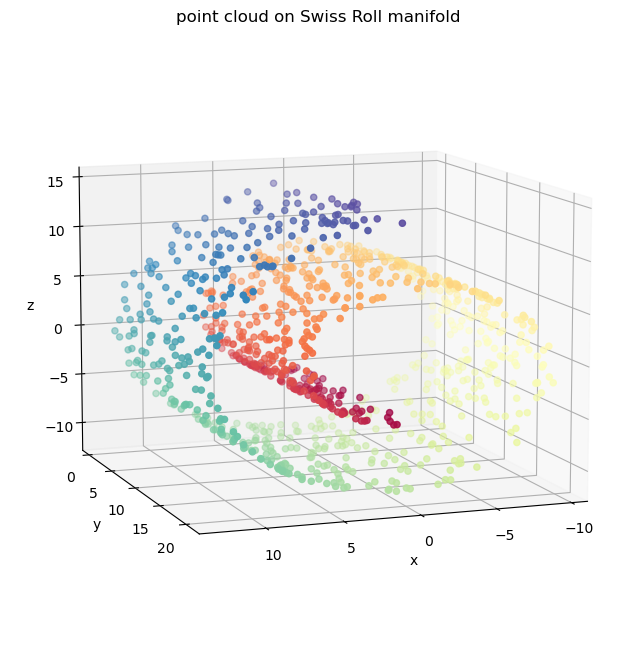

In [3]:
plot_ori_swiss_roll(nr_samples_plot= 1000)


1.1 Illustration of Implementation for Diffusion Map

1.1.1 plot embedding of pairwise eigenvector

epsilon=0.3165674272282849, cut-off=2.414826600587837


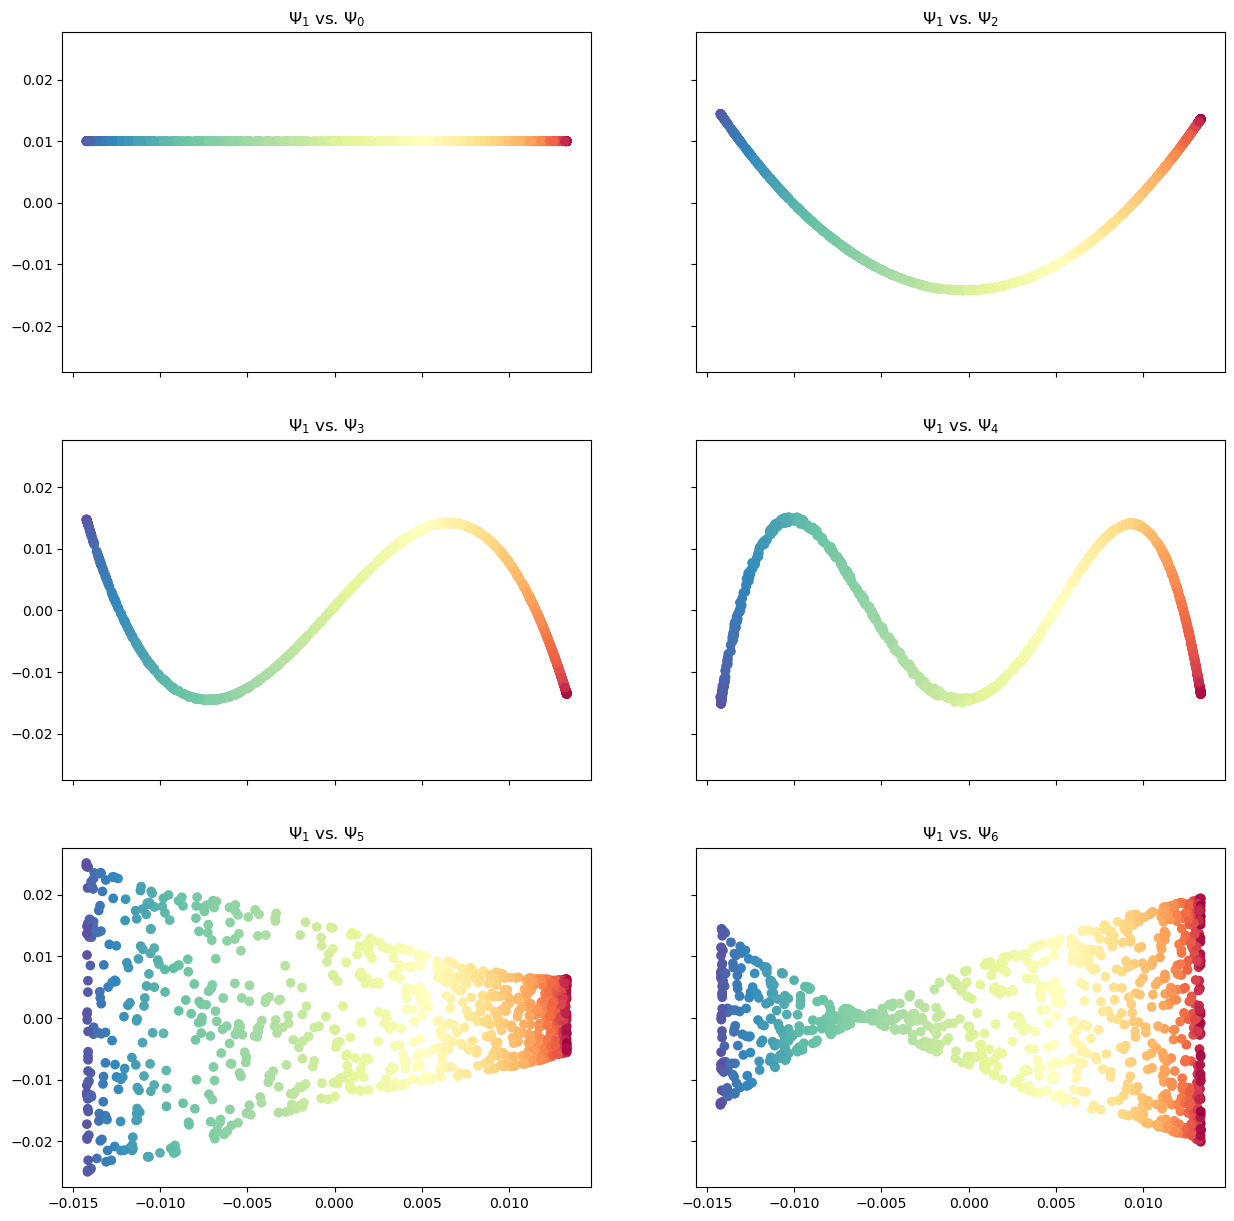

In [4]:
nr_samples = 10000
dimention = 3
X_pcm, X_color, idx_plot = preprocess_sr(nr_samples,dimention)
target_mapping,dmap = diffusion(X_pcm,True)
plot_pair_eigenvector_dm(dmap,idx_plot,X_color)



1.1.2 select and plot with the best pair of eigenvecter

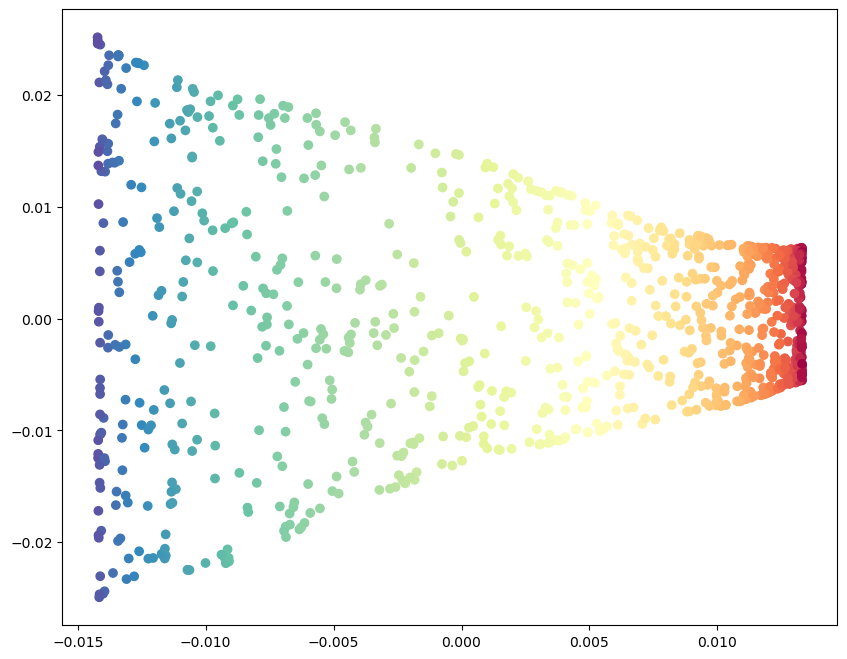

In [5]:
plot_selected_vector(target_mapping,idx_plot,X_color)


1.2 Illustration of Implementation for Roseland 

1.2.1 plot embedding of pairwise svdvector

epsilon=0.33837242271884616, cut-off=2.496607772851306


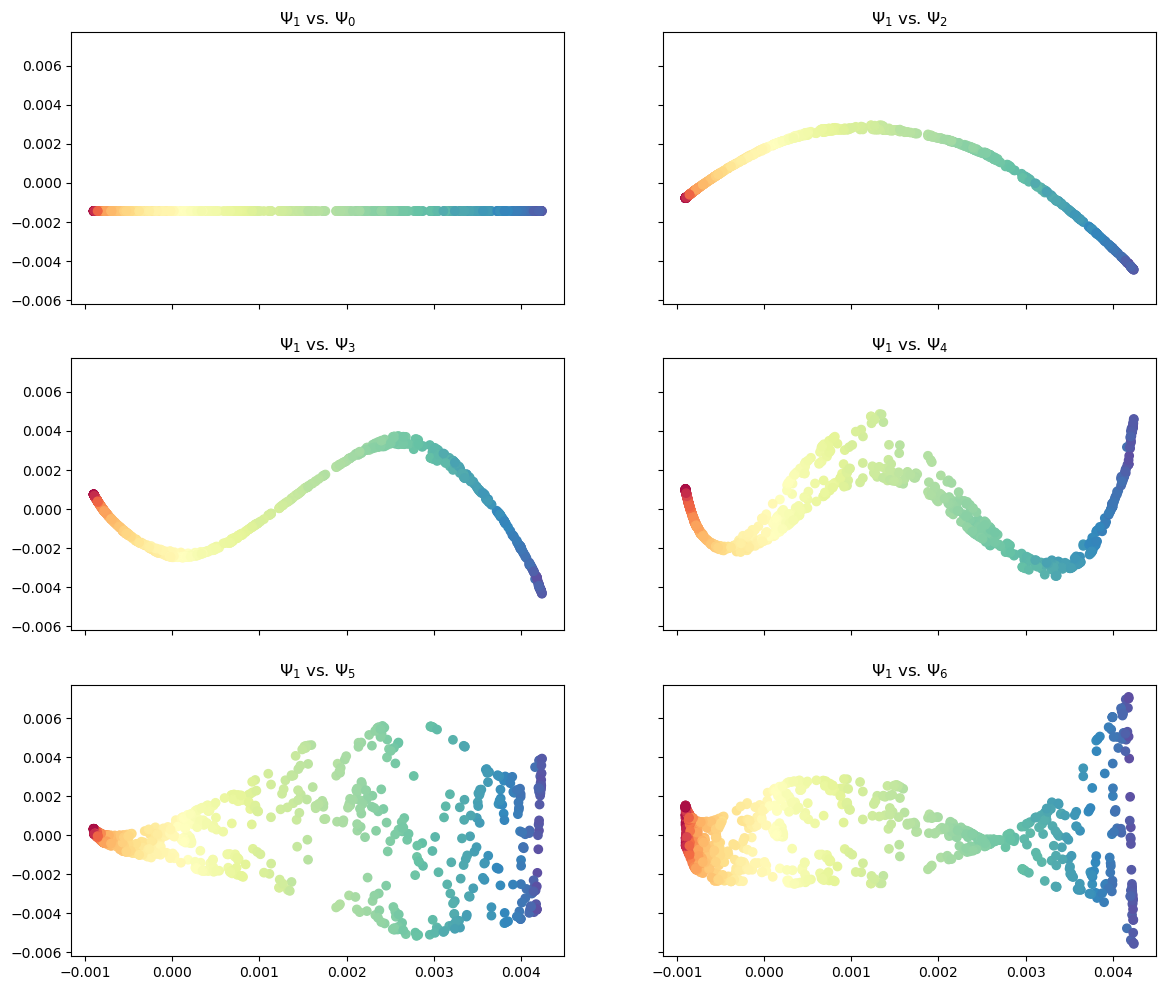

In [13]:
nr_samples = 10000
dimention = 3
X_pcm, X_color, idx_plot = preprocess_sr(nr_samples,dimention)
target_mapping,rose,svdvecs = roseland(X_pcm,True)
plot_pair_eigenvector_r(svdvecs,idx_plot,X_color)



1.1.2 select and plot with the best pair of svdvector

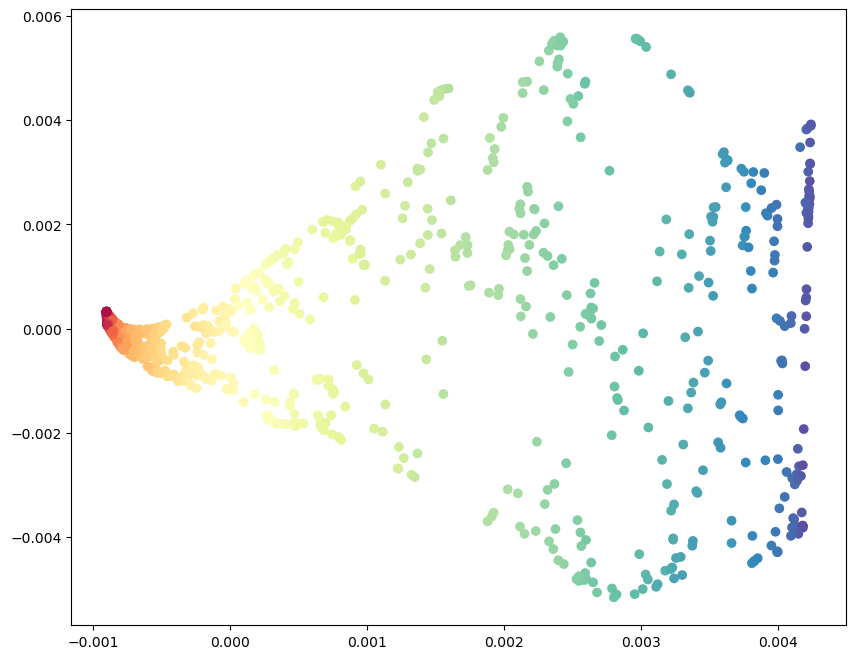

In [14]:

plot_selected_vector(target_mapping,idx_plot,X_color)


2 Comparison running time of Diffusion Maps vs Roseland:

2.1 Comparison running time with fixed dimension and increasing dataset size

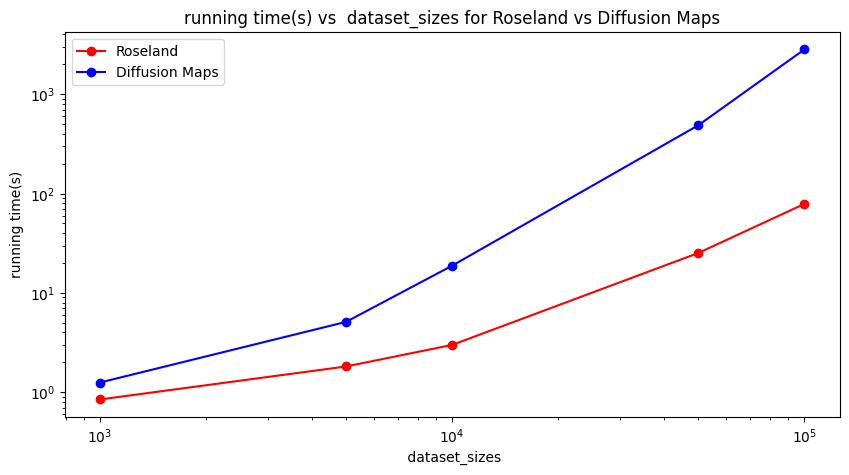

In [2]:
# In creasing dataset_sizes 
dataset_sizes = [1000,5000, 10000, 50000, 100000]
# fixed demension
fixed_dimension = 100

dm_times = []
r_times = []
for N in dataset_sizes:
  X_pcm, X_color, idx_plot = preprocess_sr(N,fixed_dimension)
  r_time,dm_time = timer_for_both(X_pcm)
  dm_times.append(dm_time)
  r_times.append(r_time)

# genarate curve for comparison of running time
plot_vs(dataset_sizes,r_times,dm_times,' dataset_sizes','running time(s)')



2.2 Comparison running time with fixed dataset size and increasing dimension

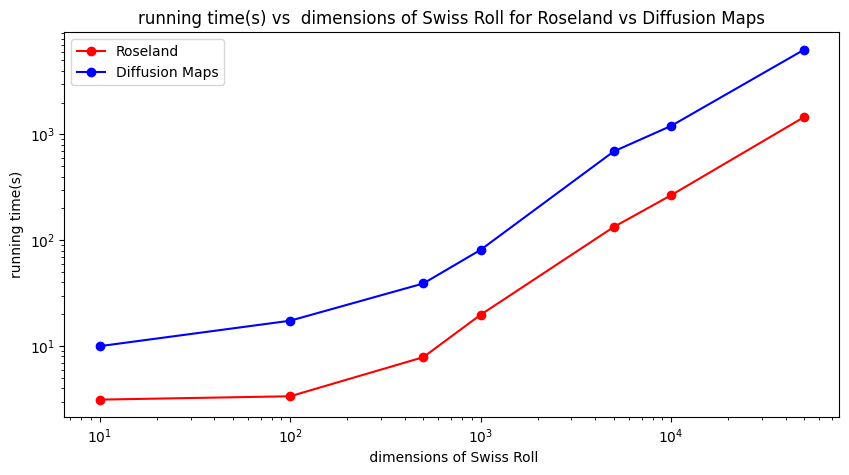

In [3]:
# increasing dimension
dimensions= [10,100,500,1000,5000, 10000, 50000]
# fixed dataset size
fixed_dataset_sizes = 10000

dm_times = []
r_times = []
for D in dimensions:
  X_pcm, X_color, idx_plot = preprocess_sr(fixed_dataset_sizes,D)
  r_time,dm_time = timer_for_both(X_pcm)
  dm_times.append(dm_time)
  r_times.append(r_time)

# genarate curve for comparison of running time
plot_vs(dimensions,r_times,dm_times,' dimensions of Swiss Roll','running time(s)')



3 Comparison Trustworthiness of Diffusion Maps vs Roseland:


3.1 Comparison Trustworthiness with fixed  dimension and increasing dataset size

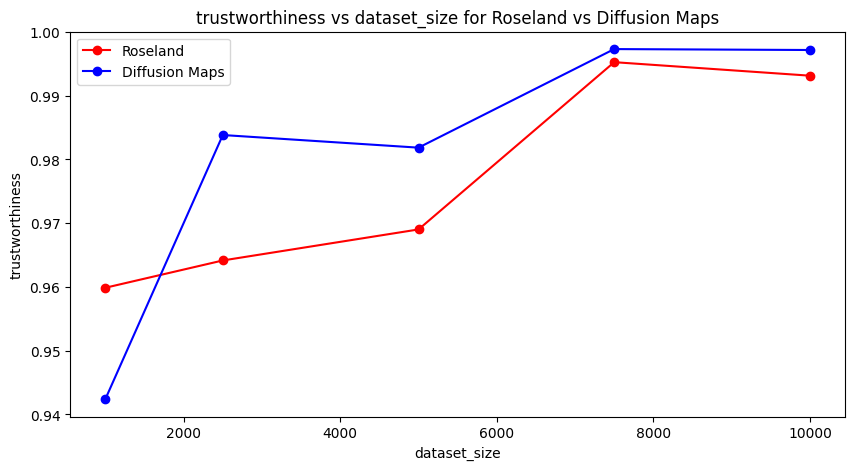

In [15]:
# fixed dimension and increasing dataset_size
fixed_dimension = 100
dataset_sizes = [1000,2500,5000,7500,10000]


trustworthiness_score_dms=[]
trustworthiness_score_rs = []

for N in dataset_sizes:
  
  X_pcm, X_color, idx_plot = preprocess_sr(N,fixed_dimension)
  # For Roseland
  target_mapping_r = roseland(X_pcm)
  trustworthiness_score_r = trustworthiness(X_pcm, target_mapping_r)
  trustworthiness_score_rs.append(trustworthiness_score_r)

  # For diffusion maps

  target_mapping_dm = diffusion(X_pcm)
  trustworthiness_score_dm = trustworthiness(X_pcm, target_mapping_dm)
  trustworthiness_score_dms.append(trustworthiness_score_dm)

# genarate curve for comparison for trustworthiness_score
plot_vs(dataset_sizes,trustworthiness_score_rs,trustworthiness_score_dms,'dataset_size','trustworthiness',log_flag=False)

3.2 Comparison Trustworthiness with fixed dataset size and increasing dimension

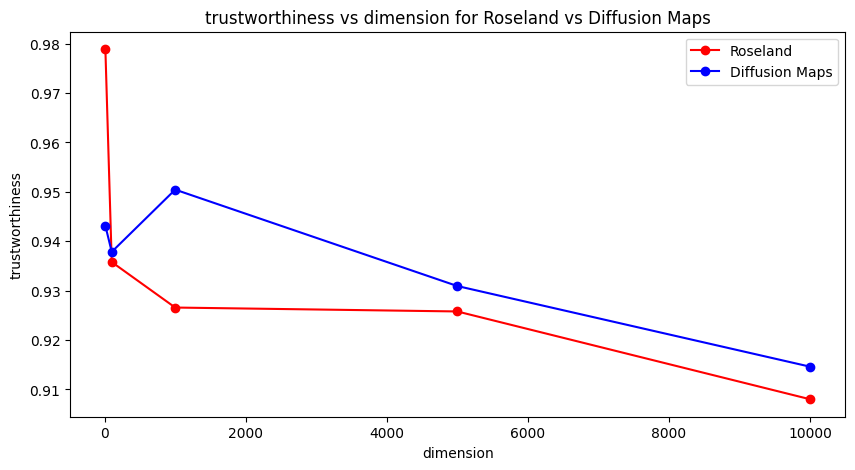

In [29]:
# fixed_dataset_size and increasing dimension
fixed_dataset_sizes = 1000
dimensions = [10,100,1000,5000,10000]

trustworthiness_score_dms=[]
trustworthiness_score_rs = []
for D in dimensions:
  X_pcm, X_color, idx_plot = preprocess_sr(fixed_dataset_sizes,D)
  target_mapping_r = roseland(X_pcm)
  # For Roseland

  trustworthiness_score_r = trustworthiness(X_pcm, target_mapping_r)
  trustworthiness_score_rs.append(trustworthiness_score_r)

  # For diffusion maps

  target_mapping_dm = diffusion(X_pcm)
  trustworthiness_score_dm = trustworthiness(X_pcm, target_mapping_dm)
  trustworthiness_score_dms.append(trustworthiness_score_dm)


# genarate curve for comparison of trustworthiness score
plot_vs(d,trustworthiness_score_rs,trustworthiness_score_dms,'dimension','trustworthiness',log_flag=False)


4 The Landmark set of Roseland

4.1 Illustration with scatter


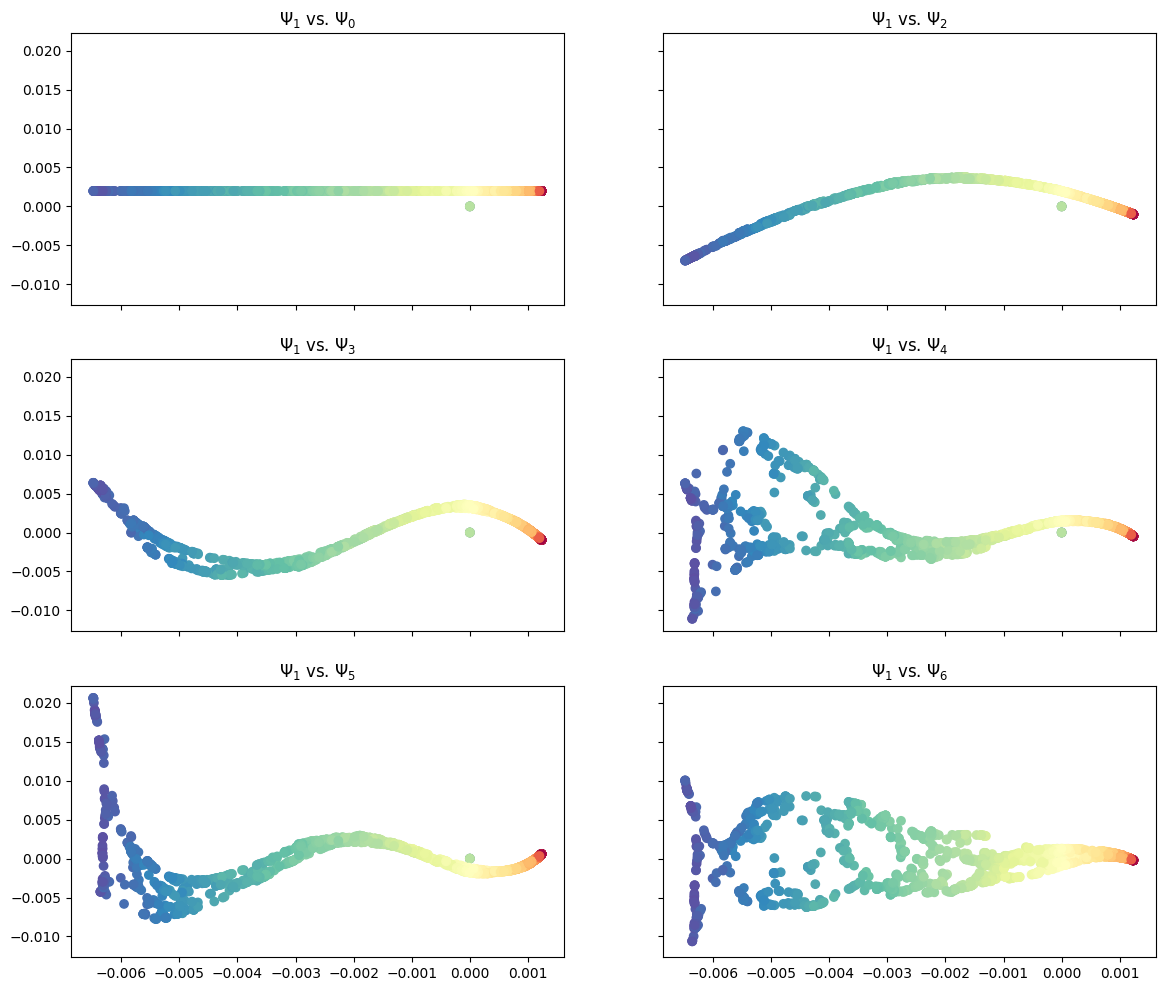

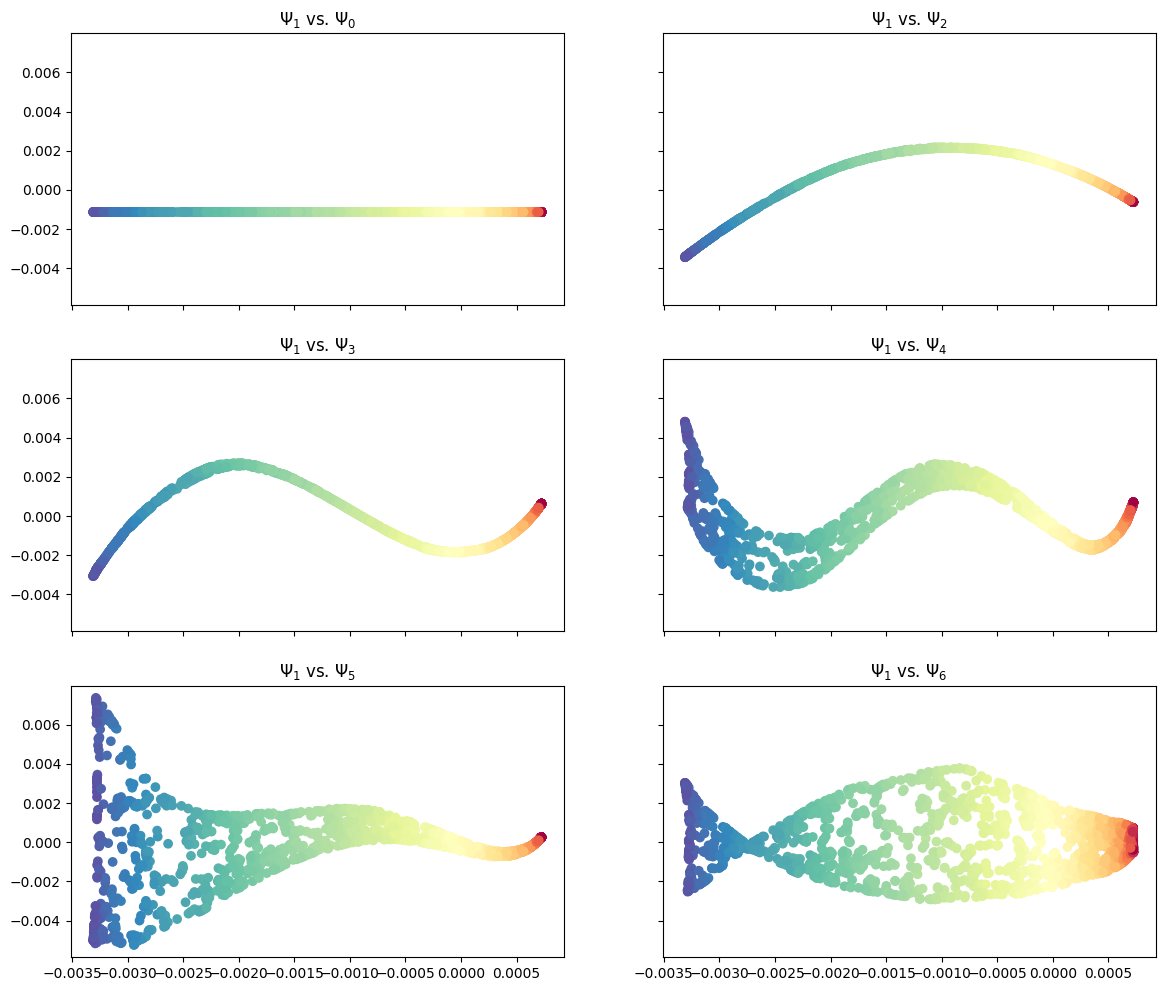

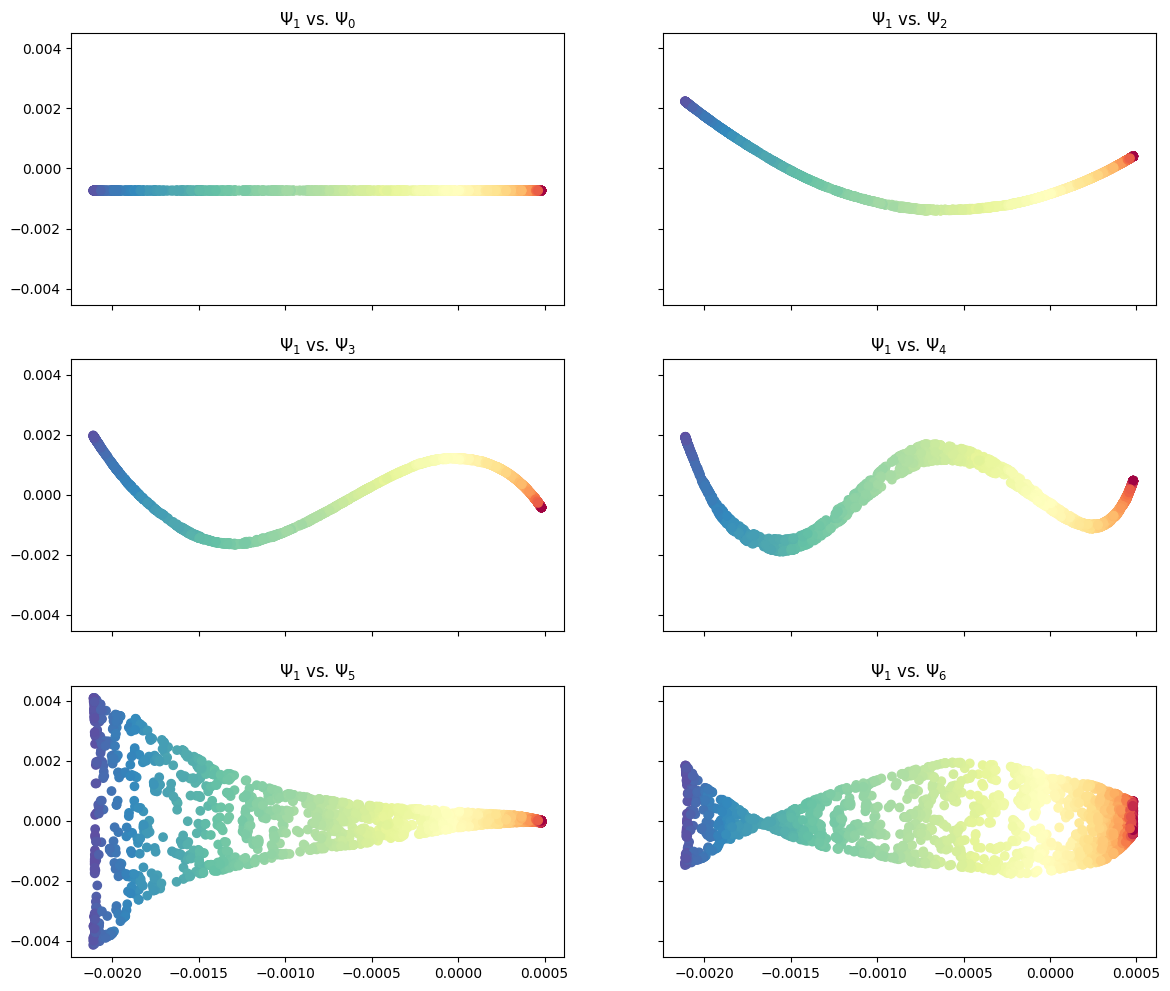

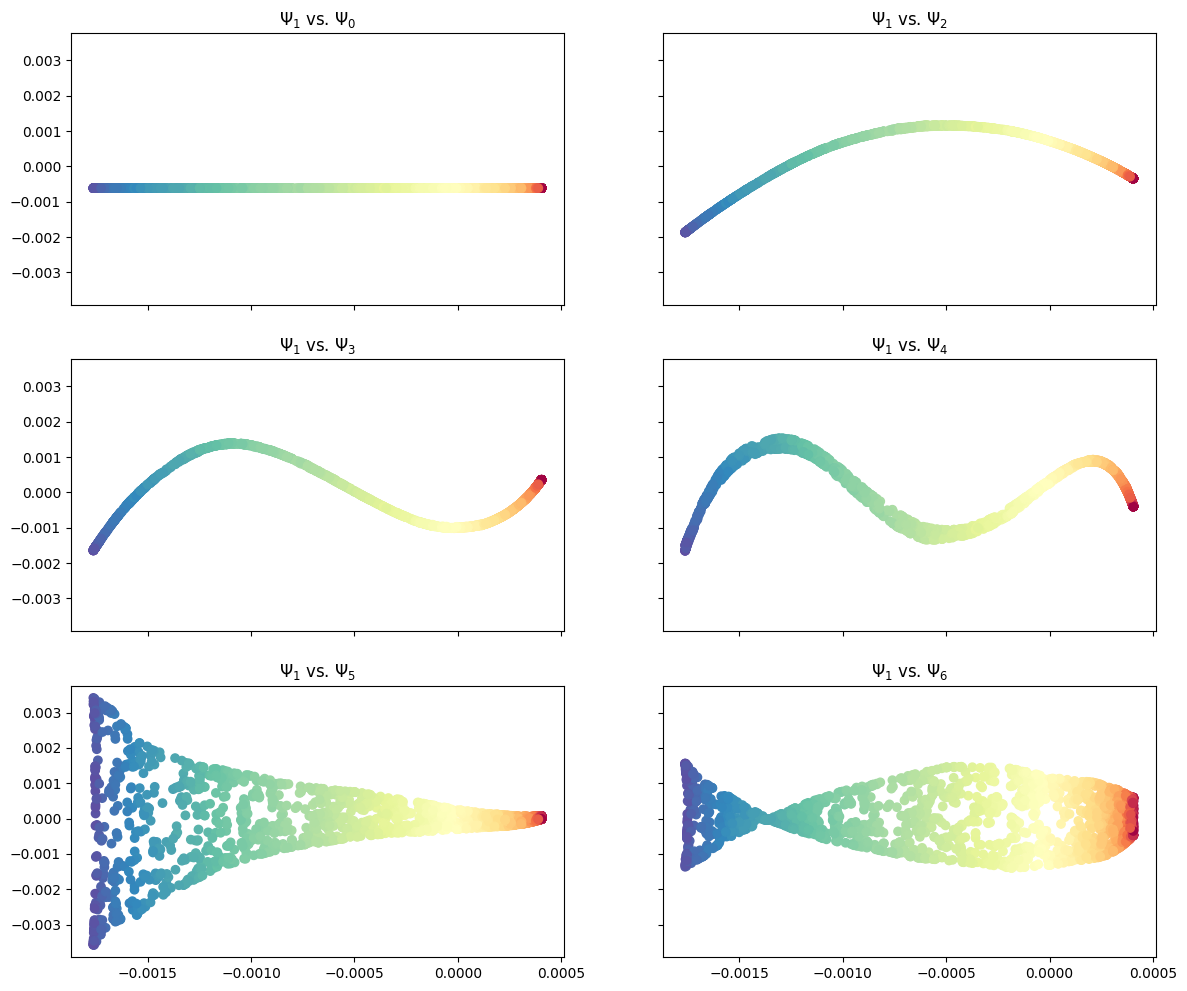

In [6]:
nr_samples = 25000
dimention = 3
X_pcm, X_color, idx_plot = preprocess_sr(nr_samples,dimention)
for lm in [0.1,0.3,0.7,1.0  ]:
    target_mapping,rose,svdvecs = roseland(X_pcm,True,lm)
    plot_pairwise_eigenvector(
        eigenvectors=svdvecs[idx_plot, :],
        n=1,

        fig_params=dict(figsize=[14, 12]),
        scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
    )



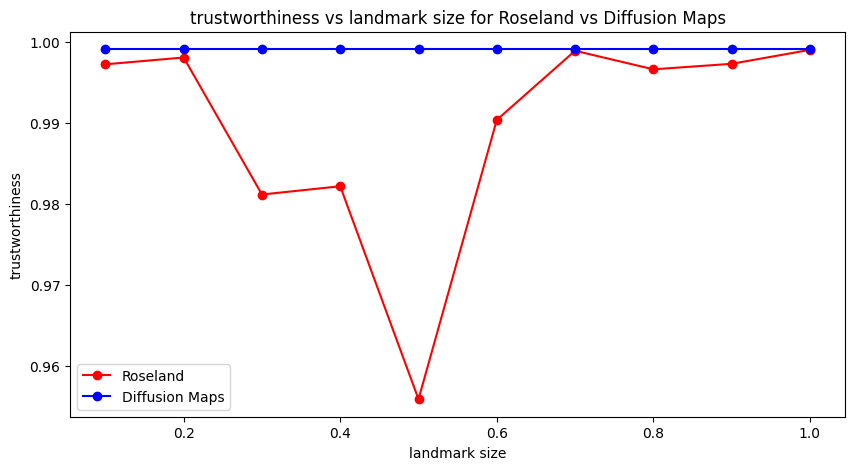

In [2]:
trustworthiness_score_rs = []
trustworthiness_score_dms = []

fixed_dimension = 10
fixed_dataseet_size=10000
landmarks=[]
X_pcm, X_color, idx_plot = preprocess_sr(fixed_dataseet_size,fixed_dimension)
# Trustworthiness_score of Diffusion map
target_mapping_dm = diffusion(X_pcm)
trustworthiness_score_dm = trustworthiness(X_pcm, target_mapping_dm, n_neighbors=5)
# Trustworthiness_score of Roseland with different landmark sizes

for lmark in np.arange(0.1,1.1,0.1):
  trustworthiness_score_dms.append(trustworthiness_score_dm)

  X_pcm, X_color, idx_plot = preprocess_sr(fixed_dataseet_size,fixed_dimension)
  target_mapping_r = roseland(X_pcm)
  trustworthiness_score_r = trustworthiness(X_pcm, target_mapping_r, n_neighbors=5)
  trustworthiness_score_rs.append(trustworthiness_score_r)
  landmarks.append(lmark)
# generate curve for comparison of trustworthiness
plot_vs(landmarks,trustworthiness_score_rs,trustworthiness_score_dms,'landmark size','trustworthiness',log_flag=False)

4.3 Running Time vs landmark set size

4.2 Trustworthniess vs landmark set size

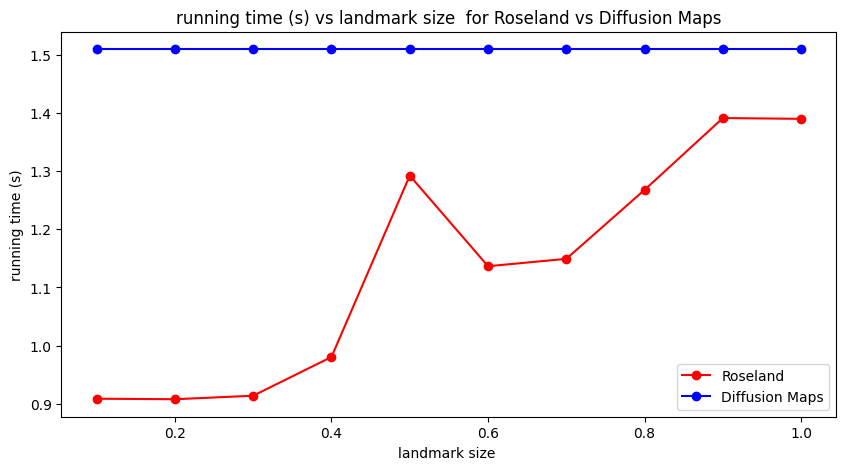

In [11]:
# lmark
dm_times = []
r_times = []
landmarks=[]

fixed_dimension = 100
fixed_dataseet_size = 1000


X_pcm, X_color, idx_plot = preprocess_sr(fixed_dataseet_size,fixed_dimension)

# for lmark in [0.1,0.4,0.7,0.9,1.0]:
dm_time = run_time(X_pcm,'dm')
# dm_time= 354.40389490127563
for lmark in np.arange(0.1,1.1,0.1):
  dm_times.append(dm_time)
  r_time = run_time(X_pcm,'r',lmark)
  r_times.append(r_time)

  landmarks.append(lmark)

# genarate curve for comparison
plot_vs(landmarks,r_times,dm_times,'landmark size ','running time (s)',log_flag=False)


5 Robustness to noise

5.1 illustration with scatter

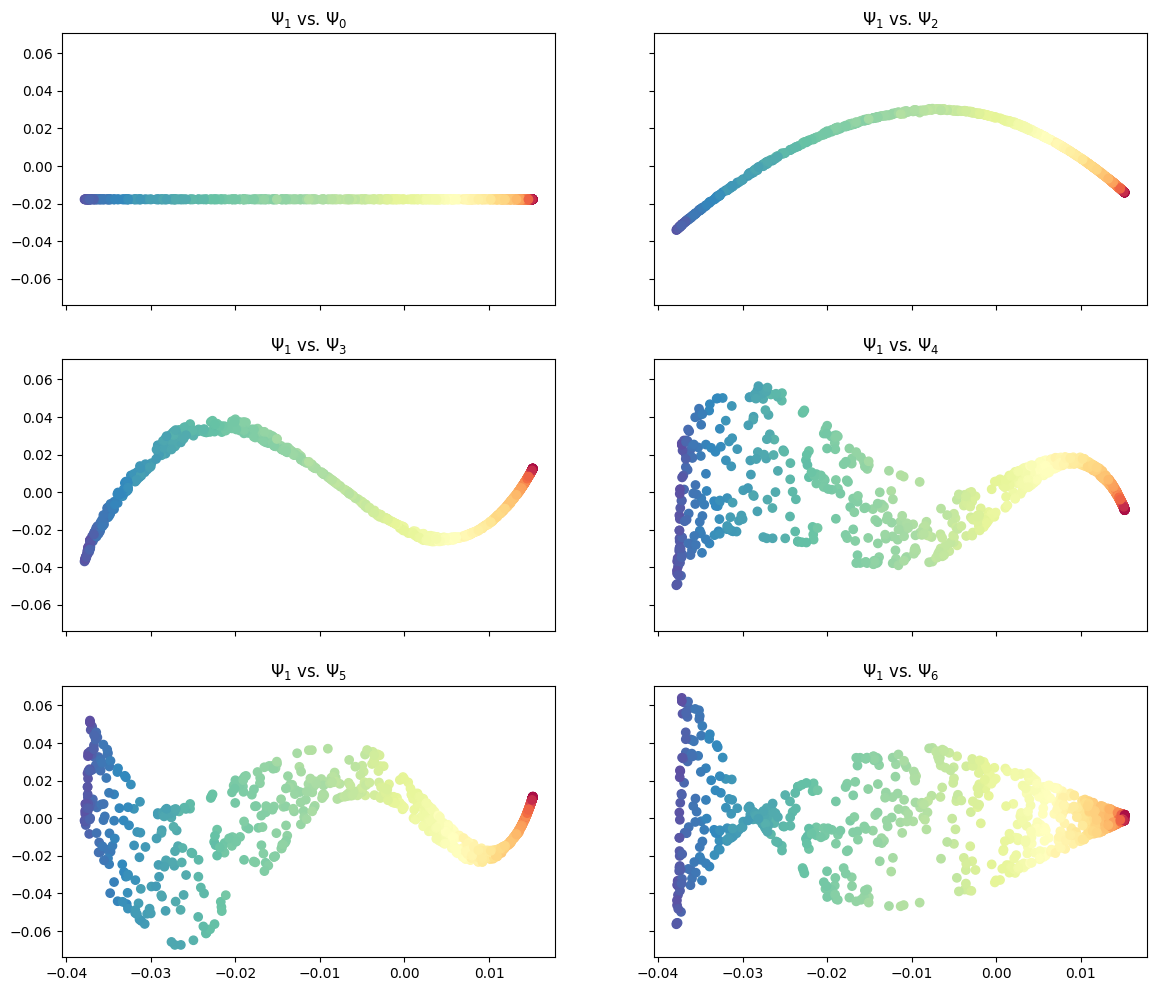

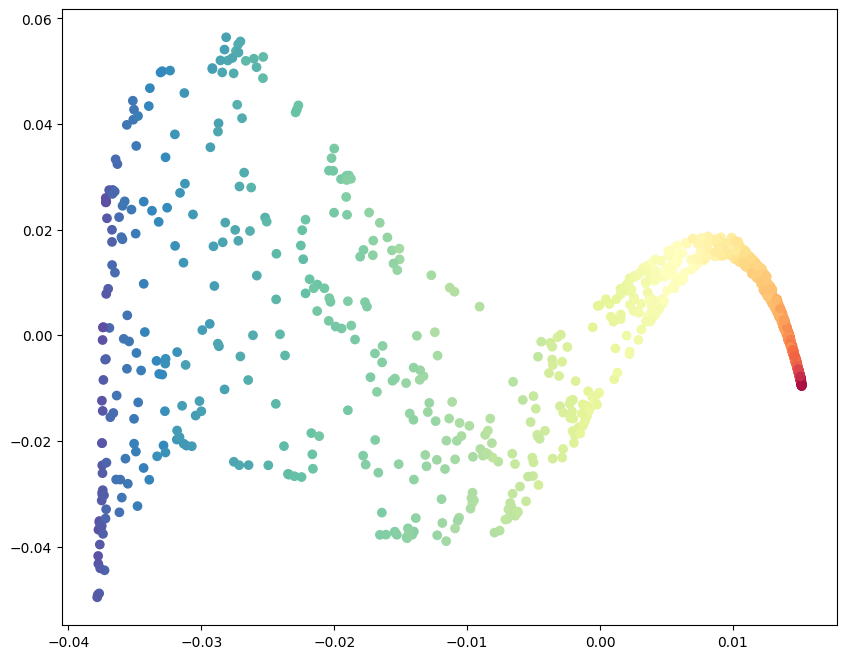

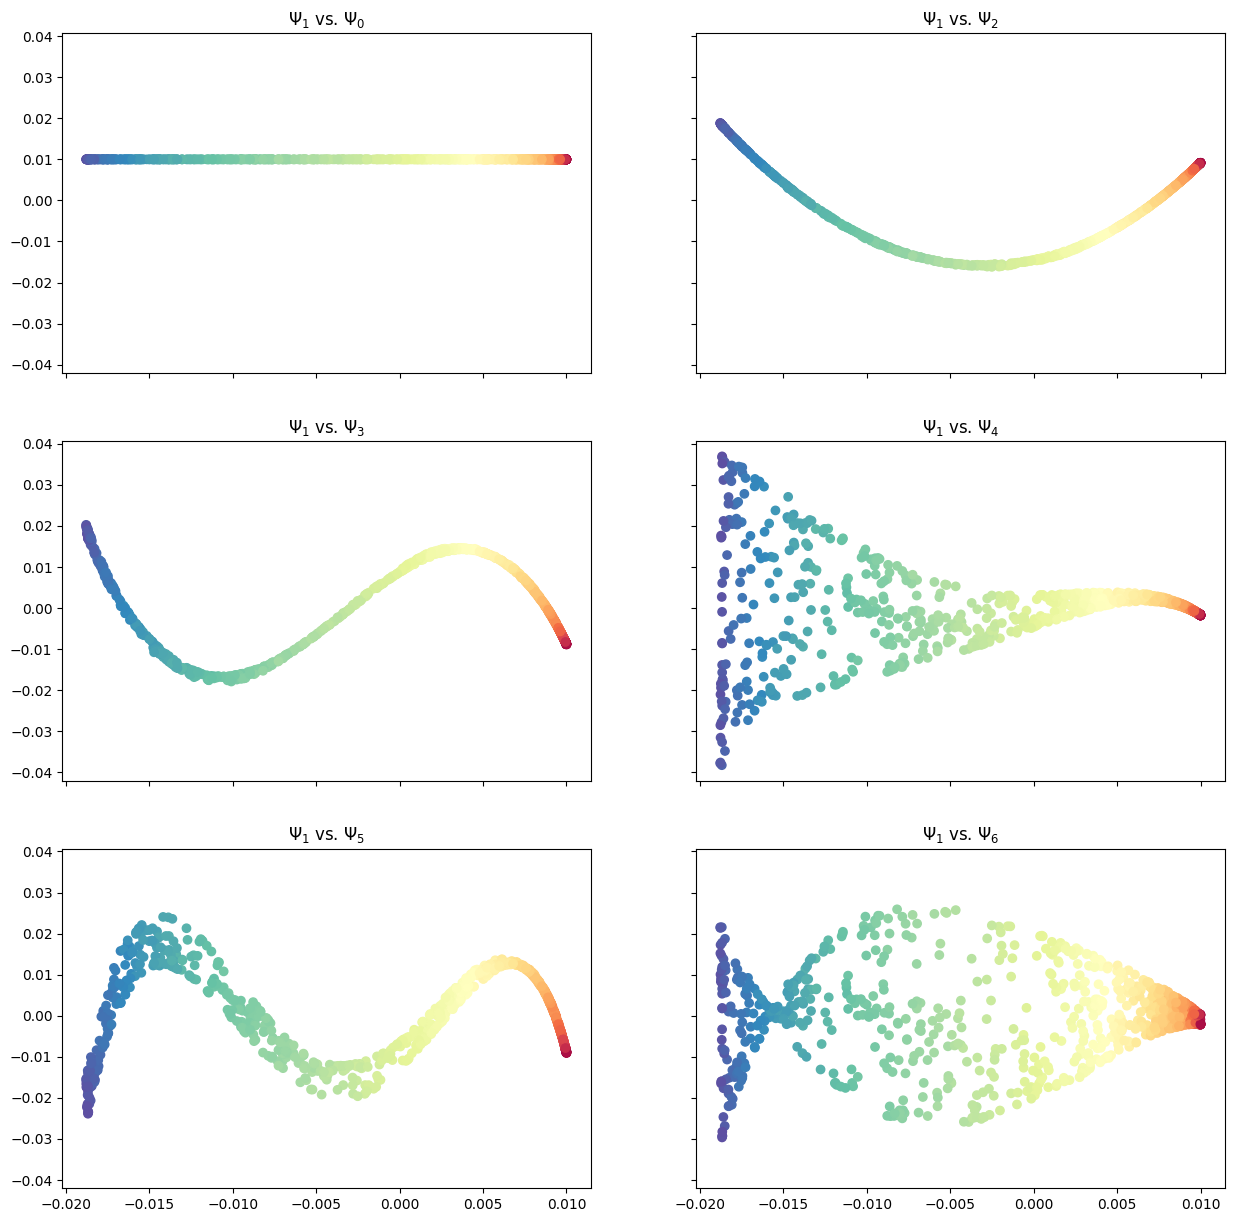

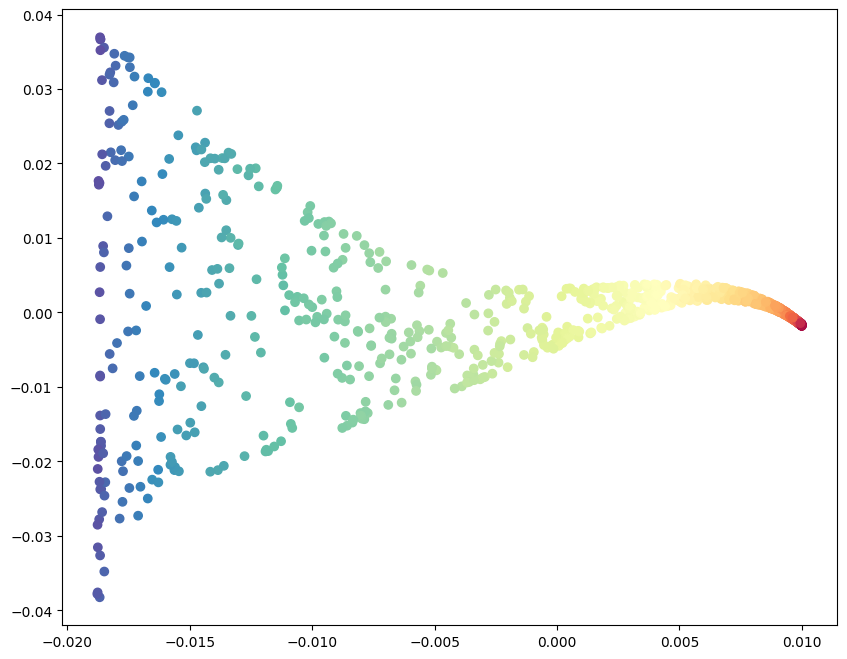

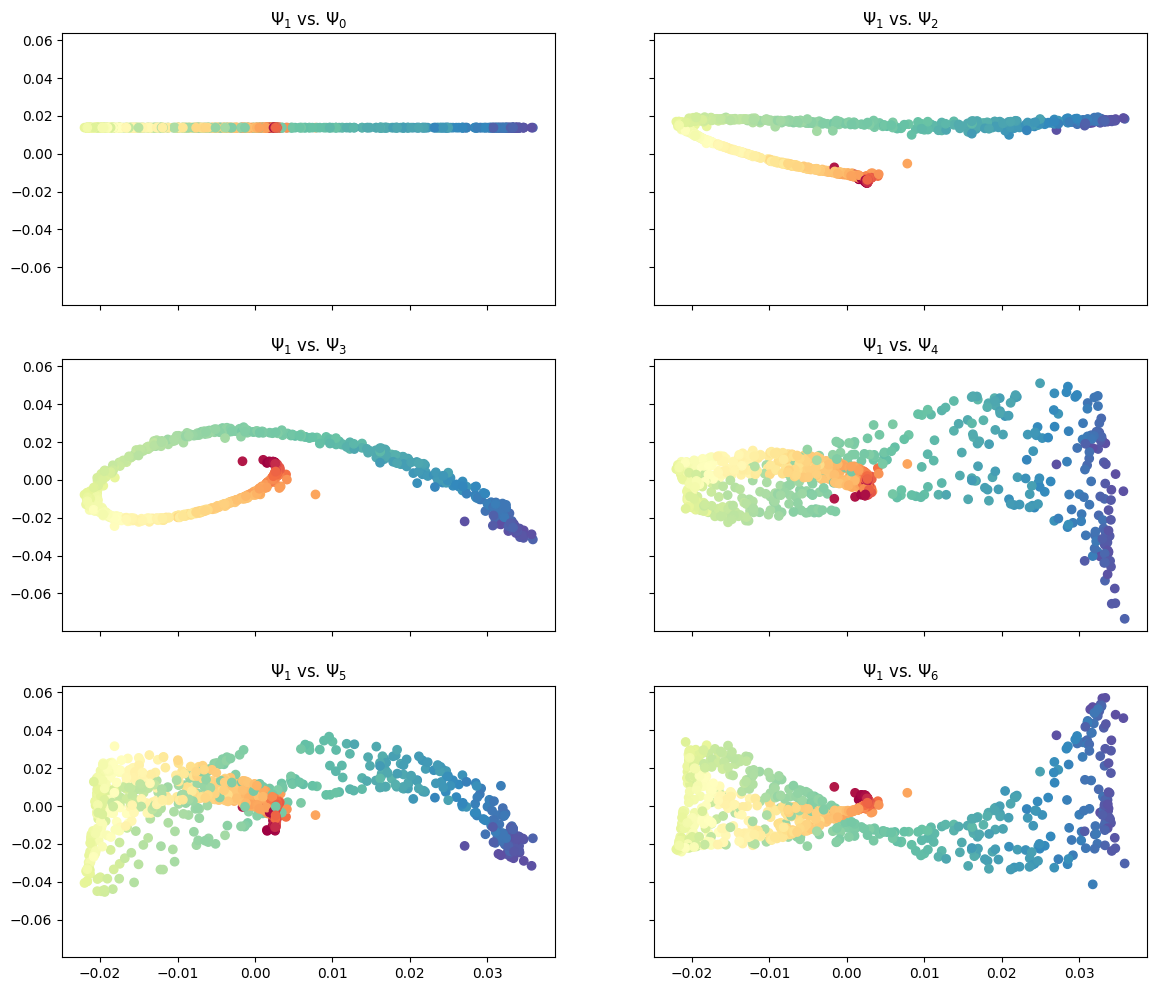

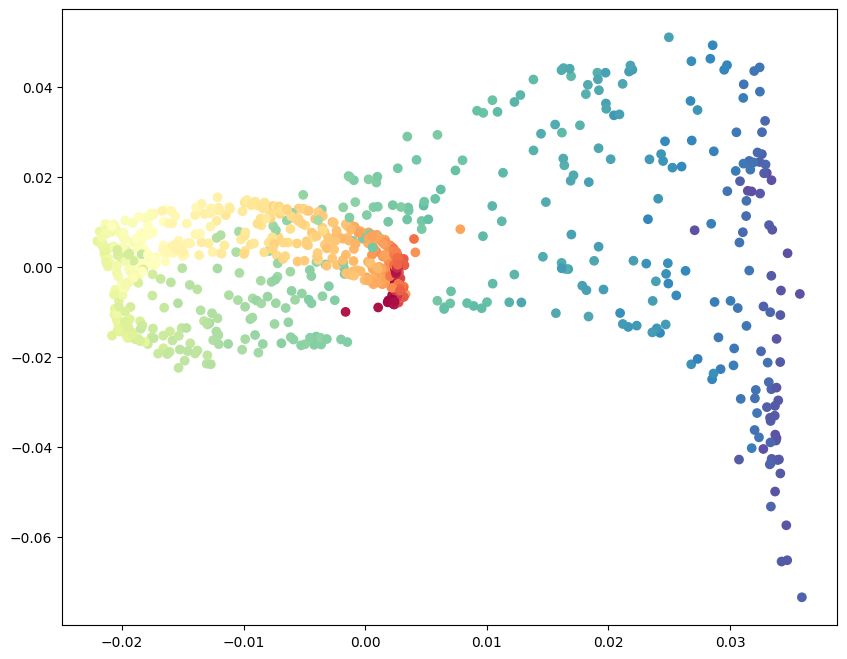

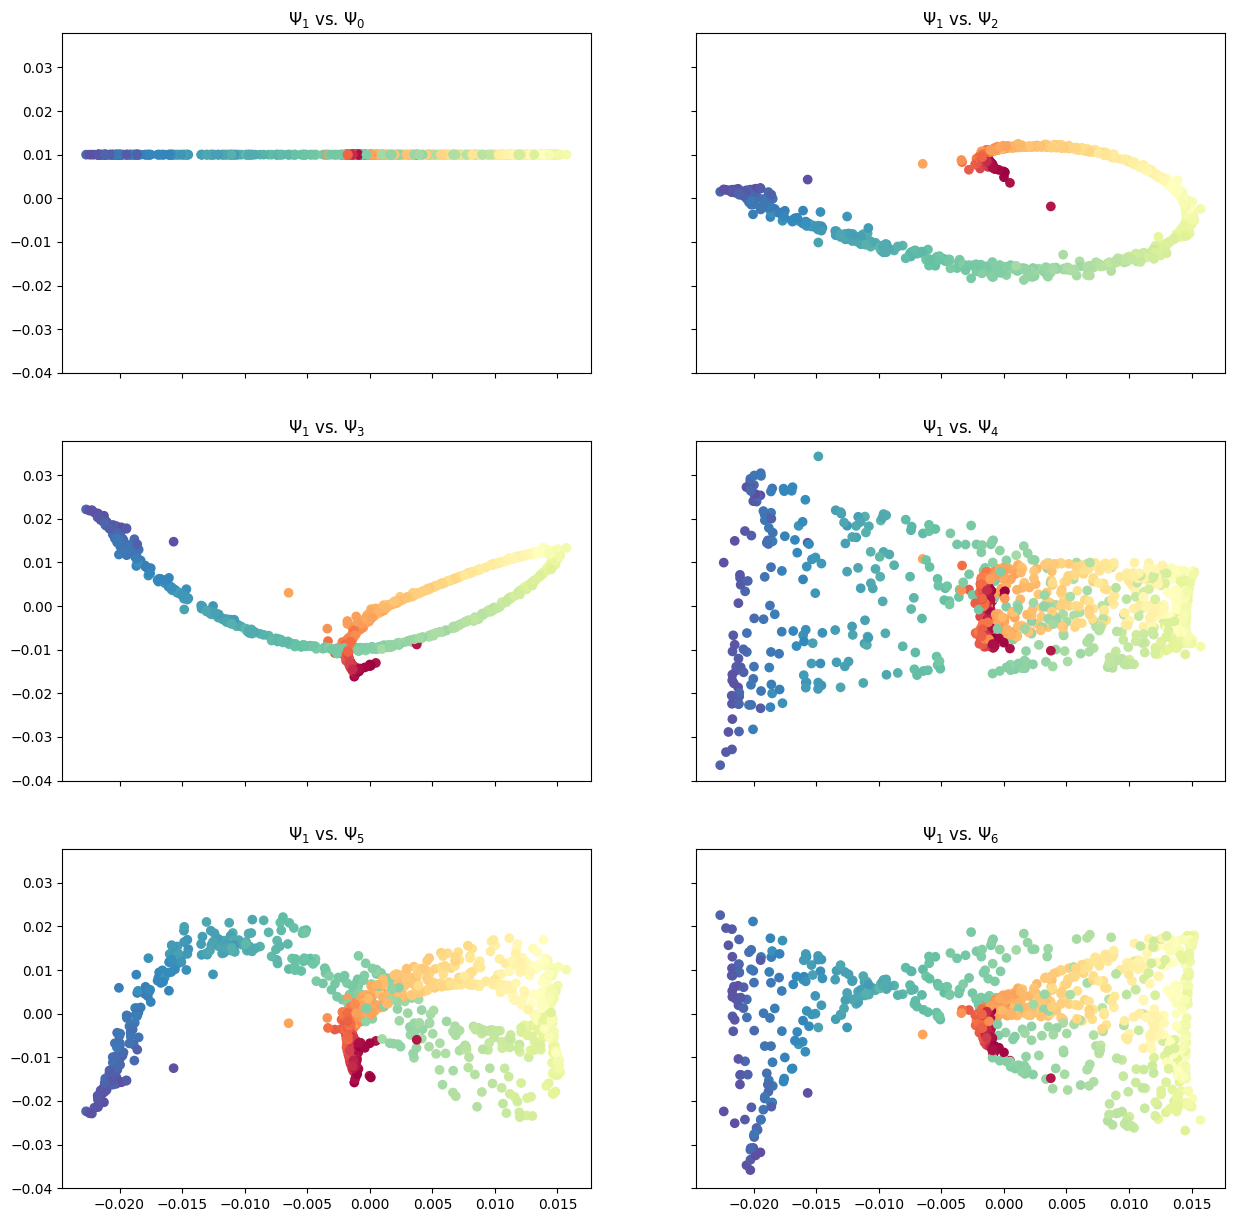

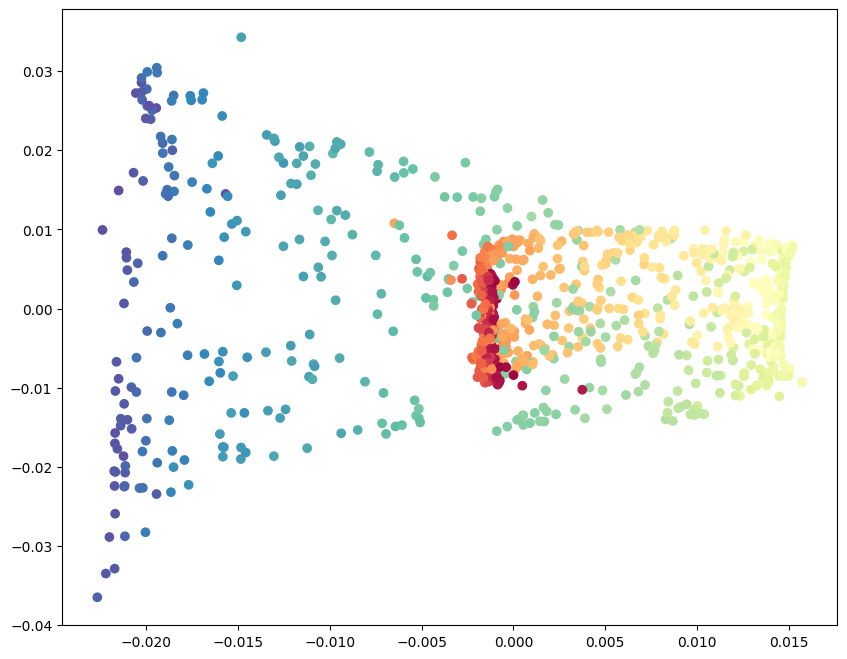

In [ ]:
noise_sizes = [0.5,1.0]

trustworthiness_score_dms=[]
trustworthiness_score_rs = []
fixed_dataseet_size=10000
fixed_dimension = 100
noises = []

for noise in noise_sizes:
    X_pcm, X_color, idx_plot = preprocess_sr(fixed_dataseet_size,fixed_dimension,noise=noise)
    target_mapping,rose,svdvecs = roseland(X_pcm,True)
    plot_pair_eigenvector_r(svdvecs,idx_plot,X_color)
    plot_selected_vector(target_mapping,idx_plot,X_color)
    
    target_mapping,dmap = diffusion(X_pcm,True)
    plot_pair_eigenvector_dm(dmap,idx_plot,X_color)

    plot_selected_vector(target_mapping,idx_plot,X_color)



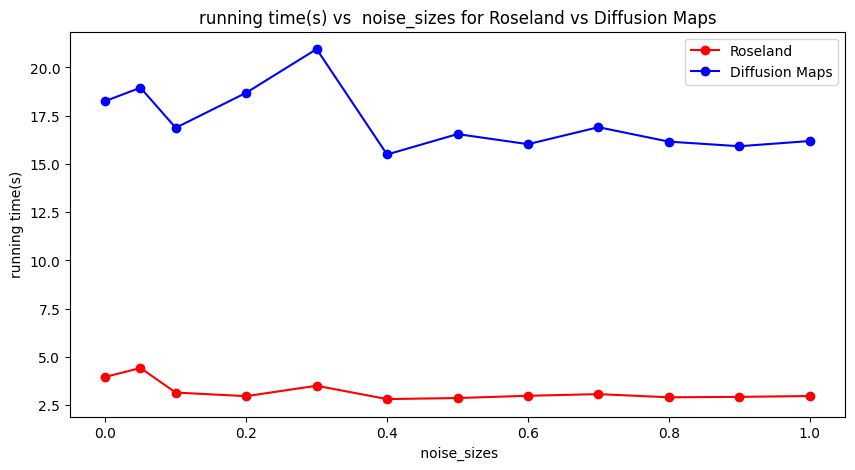

In [ ]:
# Incresing noises
noise_sizes = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# fixed dataseet_size and dimension 
fixed_dataseet_size=10000
fixed_dimension = 100

noises = []
dm_times=[]
r_times = []

for noise in noise_sizes:
  X_pcm, X_color, idx_plot = preprocess_sr(fixed_dataseet_size,fixed_dimension)

  r_time,dm_time = timer_for_both(X_pcm)
  r_times.append(r_time)
  dm_times.append(dm_time)

# genarate curve for comparison
plot_vs(noise_sizes,r_times,dm_times,' noise_sizes','running time(s)',log_flag=False)
